# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

1. Determine Business Objectives

(1) Background: The provided dataset contains information on 426K cars including features and price/value. 

(2) Business Objectives: The goal is to understand what factors/features make a car more or less expensive. 

(3) Business Success Criteria: As a result of this model based analysis, the model should provide clear recommendations to the client what consumers value in a used car and we can provide a clear indication about the estimated price


2. Assess Situation

(1) Inventory of Resources: class chat in module 11, python and modeling, and other previous trainings in this course. 

(2) Requirements, Assumptions, and Constraints: this is a practice work due Feb 28th, no legal issue with data usage. The assumptions are good data collection in the public database. Due to the limiation of CPU power, a fration of the whole dataset (containing 3 million cars) was used. 

(3) Risks and Contingencies terminology: The success may rely on good analysis skillset of the performer in this case.

(4) Costs and Benefits: It is a good business model which could be used for car resale companies across the world. 


3. Determine Data Mining Goals

（1） Data Mining Goals：Predict the price range that a seller willing to sell and a buyer willing to buy, and calcualte the business model about the gap between the buying price and sale price as revenue for the car.

（2） Data Mining Success Criteria：MSE or error rate when using trained model to predict the price of sale to untrained dataset. 


4. Produce Project Plan

（1） Project Plan：the CRISP-DM standard protocol will be carried out, in total, 16 hrs for data understanding/preparation/modeling/evaluation/deployment

（2） Initial Assessment of Tools and Techniques：


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

In [4]:
# Colletct initial data
# Output: Sample size: 426880, features: 18 (one is ID), price will be the key value (y), year and odometer could be our focus on analysis
df = pd.read_csv('data/vehicles.csv')

In [5]:
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [10]:
# Describe data
# Output: in this DataFrame, we can see sample size: 426880, features: 18: 
['id',
 'region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

df.describe()


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [11]:
#data info especially Dtype for future analysis and no need to remove null if needed in the next section
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [22]:
# Based on analysis, ID and VIN should not make an impact on the price, in that, they are removed from feature list
df = df [[
 'region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']]

In [152]:
# Due to the large size of the dataset, a randome selection was used to plot, use the trainset to narrow down (1% of the dataset) the number to get the overview
# The sub-dataset will be used to test some programing running time
from sklearn.model_selection import train_test_split, GridSearchCV
plot_df, rest_df = train_test_split(df3, random_state=42, test_size = 0.999)  

In [153]:
plot_df.head(5)

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
18344,fayetteville,84477,2020.0,bmw,NaN,other,8234.0,clean,automatic,ar
277563,new york city,14000,2008.0,NaN,2008 M2 freightliner,diesel,300000.0,clean,automatic,ny
4097,mobile,36995,2015.0,chevrolet,tahoe,gas,97917.0,clean,automatic,al
74727,colorado springs,11895,2014.0,nissan,altima sv,gas,73612.0,clean,automatic,co
246336,las vegas,15500,2020.0,honda,civic lx,gas,7500.0,rebuilt,automatic,nv


In [120]:
# odometer limit is 1M miles 
df2 = df[df['odometer'] < 400000]  

In [121]:
# price is narrowned down to less than 100K
df2 = df2[df2['price'] < 100000] 

In [124]:
df2.describe()

,price,year,odometer
count,420067.000000,418949.000000,420067.000000
mean,17356.466449,2011.278936,91065.984274
std,14767.109634,9.343884,62797.871929
min,0.000000,1900.000000,0.000000
25%,5990.000000,2008.000000,37650.000000
50%,13990.000000,2013.000000,85134.000000
75%,26500.000000,2017.000000,132992.500000
max,99999.000000,2022.000000,399999.000000


In [125]:
df2.shape

(420067, 16)

<AxesSubplot:xlabel='odometer', ylabel='price'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


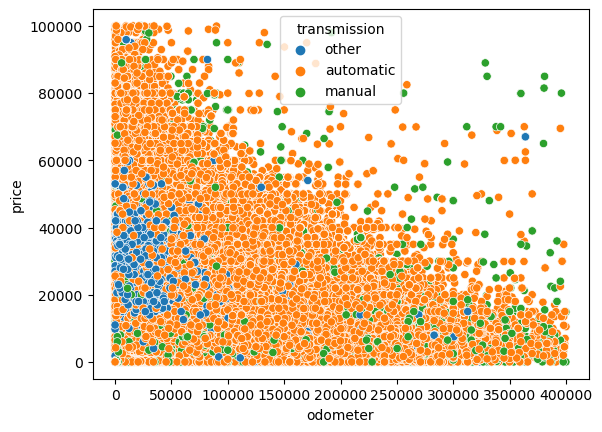

In [126]:
# initial price and odometer check found outliers which will be removed inthe next section
sns.scatterplot(x=df2['odometer'], y=df2['price'], hue=df2['transmission'])

<AxesSubplot:xlabel='year', ylabel='price'>

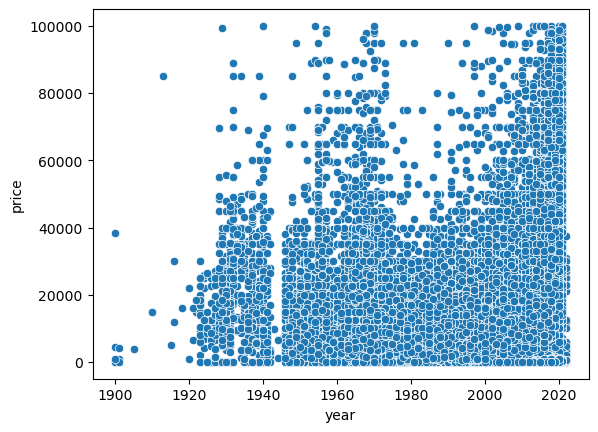

In [127]:
# check 
sns.scatterplot(x=df2['year'], y=df2['price'])

<AxesSubplot:xlabel='transmission', ylabel='count'>

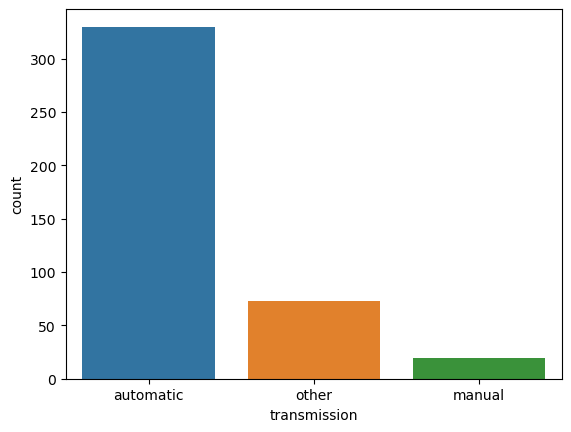

In [128]:
sns.countplot(x='transmission',  data=plot_df)

In [129]:
#Verify data qualit, in this section, we confirm it covers all the data we need, there are missing values in the dataframe
# in the next section, we will prep the data for modeling
# We will drop the features with large amount of data missing for modeling 
missing_data = pd.DataFrame(
    df2.isnull().sum(),
    columns=['Missing Values']
)
missing_data

,Missing Values
region,0
price,0
year,1118
manufacturer,16508
model,4993
condition,170490
cylinders,173644
fuel,2363
odometer,0
title_status,7600


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [200]:
# Select data, based on the data quality analysis, to build a reliable model, we will only keep featuers releveant and without large portion of nan data for further analysis

df3 = df2 [[
 'region',
 'price',
 'year',
 'manufacturer',
 'model',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'state']]

In [131]:
df3.describe()

,price,year,odometer
count,420067.000000,418949.000000,420067.000000
mean,17356.466449,2011.278936,91065.984274
std,14767.109634,9.343884,62797.871929
min,0.000000,1900.000000,0.000000
25%,5990.000000,2008.000000,37650.000000
50%,13990.000000,2013.000000,85134.000000
75%,26500.000000,2017.000000,132992.500000
max,99999.000000,2022.000000,399999.000000


<AxesSubplot:xlabel='region', ylabel='price'>

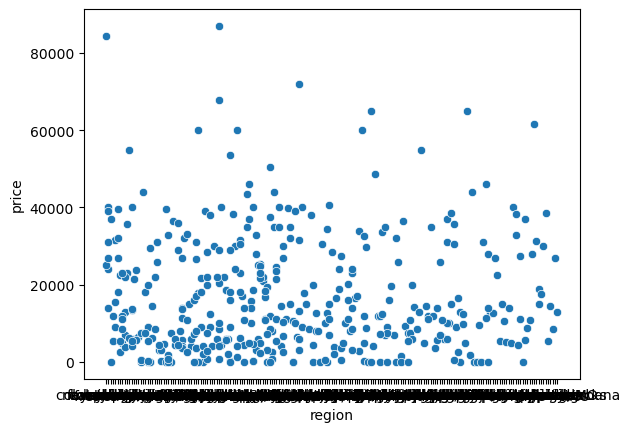

In [154]:
# Select data, the major features will affect price in df3 were screened as below: 
# we have see previously odometer and year may have direct effect
sns.scatterplot(x=plot_df['region'], y=plot_df['price'])


<AxesSubplot:xlabel='manufacturer', ylabel='price'>

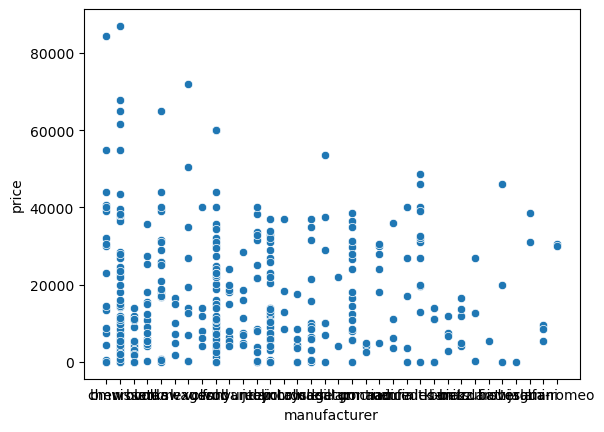

In [155]:
sns.scatterplot(x=plot_df['manufacturer'], y=plot_df['price'])


<AxesSubplot:xlabel='model', ylabel='price'>

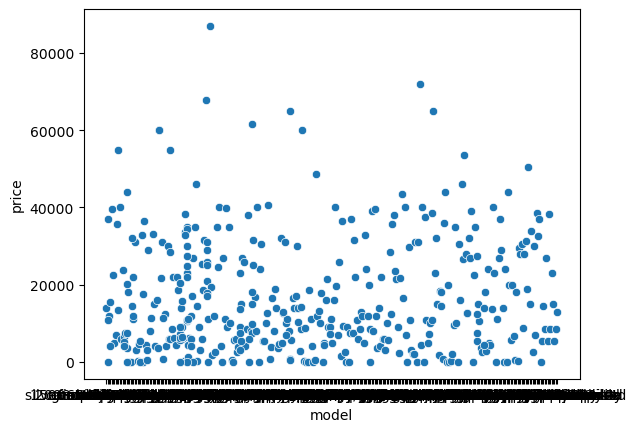

In [156]:
sns.scatterplot(x=plot_df['model'], y=plot_df['price'])


<AxesSubplot:xlabel='fuel', ylabel='price'>

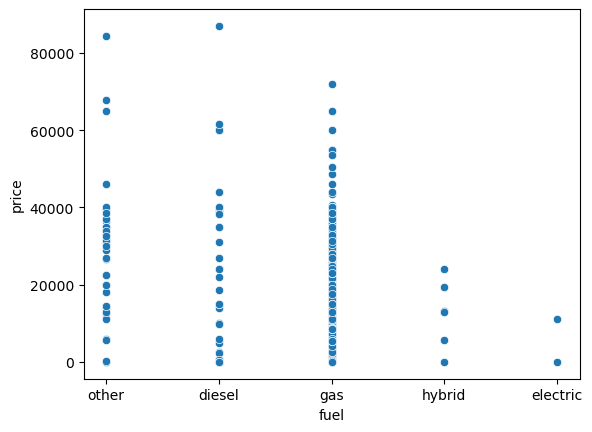

In [157]:
sns.scatterplot(x=plot_df['fuel'], y=plot_df['price'])


<AxesSubplot:xlabel='title_status', ylabel='price'>

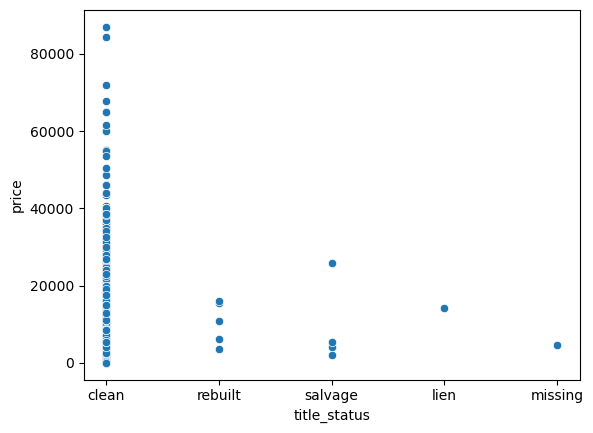

In [158]:
sns.scatterplot(x=plot_df['title_status'], y=plot_df['price'])


<AxesSubplot:xlabel='transmission', ylabel='price'>

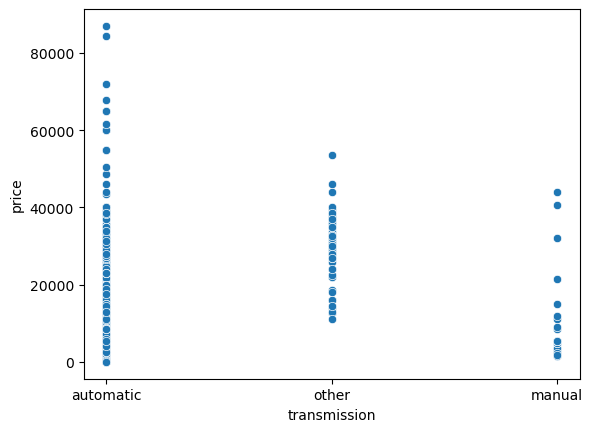

In [159]:
sns.scatterplot(x=plot_df['transmission'], y=plot_df['price'])


<AxesSubplot:xlabel='state', ylabel='price'>

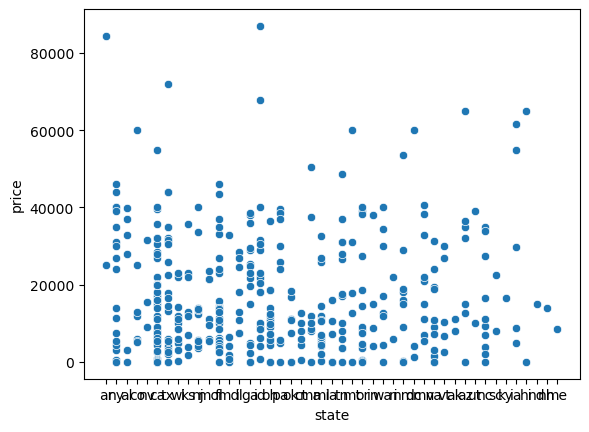

In [160]:
sns.scatterplot(x=plot_df['state'], y=plot_df['price'])


In [ ]:
plot_df = plot_df.drop(columns=['year','odometer'])

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

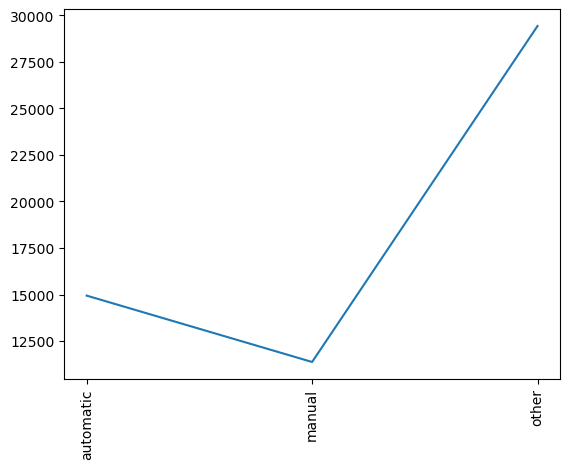

In [176]:
plt.plot(plot_df.groupby('transmission').mean())
plt.xticks(rotation=90)
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

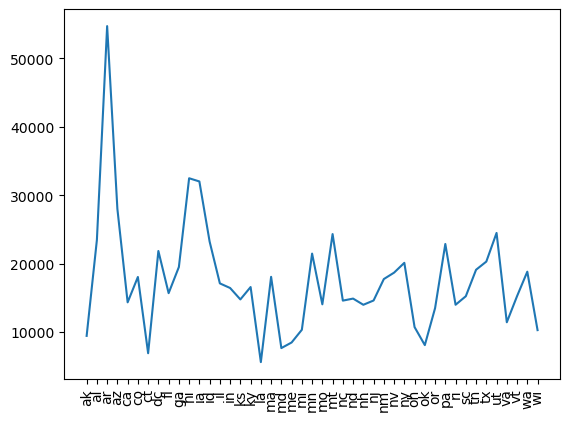

In [175]:
plt.plot(plot_df.groupby('state').mean())
plt.xticks(rotation=90)
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

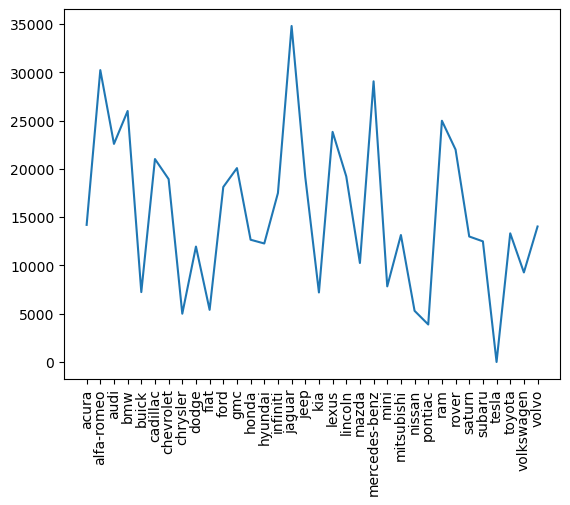

In [179]:
plt.plot(plot_df.groupby('manufacturer').mean()) #I have question on the tesla price in this case
plt.xticks(rotation=90)
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

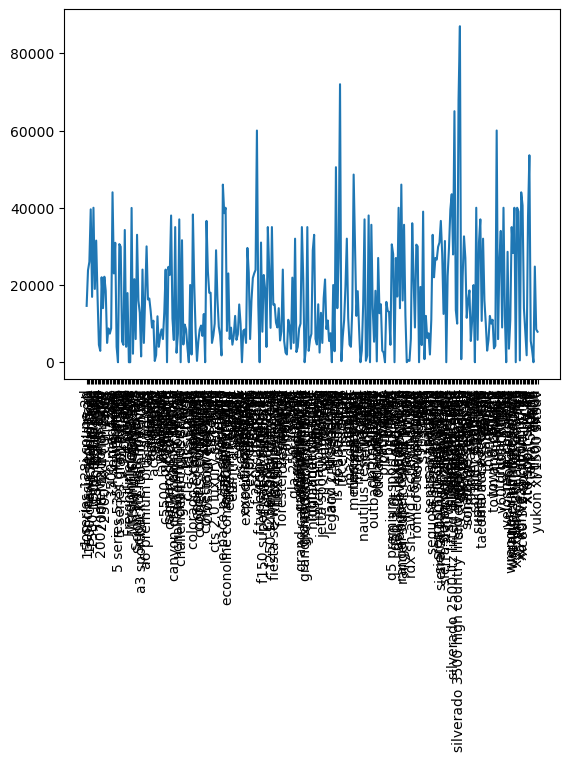

In [181]:
plt.plot(plot_df.groupby('model').mean()) #model may play a role, but there are too many models to, it is not a good feature to be included for a universal model
plt.xticks(rotation=90)
plt #although we can not see the names of model, but it is understood that there are too many models for our modeling 

In [213]:
#In the final data inclusion: features are odometer, year, transmission.
df3 = df3[['price','odometer','year', 'transmission']]

In [214]:
df3.head()

,price,odometer,year,transmission
27,33590,57923.0,2014.0,other
28,22590,71229.0,2010.0,other
29,39590,19160.0,2020.0,other
30,30990,41124.0,2017.0,other
31,15000,128000.0,2013.0,automatic


In [215]:
# Clean data, since I do not have much background info for guessing the price, the goal is to remove non-relevant data which will cause miss-prediction in modelling step
df4 = df3.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [216]:
df3.shape

(401935, 4)

In [217]:
#check again the missing-data
missing_data = pd.DataFrame(
    df3.isnull().sum(),
    columns=['Missing Values']
)
missing_data

,Missing Values
price,0
odometer,0
year,0
transmission,0


In [218]:
#Construct data, in this step, derived attributes were considrered for modelling 

In [223]:
#non-numeric value changed for next step
df3.replace({'transmission':{'manual':0, 'automatic':1, 'other':2}}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [225]:
# correlation was analyzed after the change
df3.corr()

,price,odometer,year,transmission
price,1.000000,-0.457580,0.314047,0.274121
odometer,-0.457580,1.000000,-0.351648,-0.336007
year,0.314047,-0.351648,1.000000,0.327307
transmission,0.274121,-0.336007,0.327307,1.000000


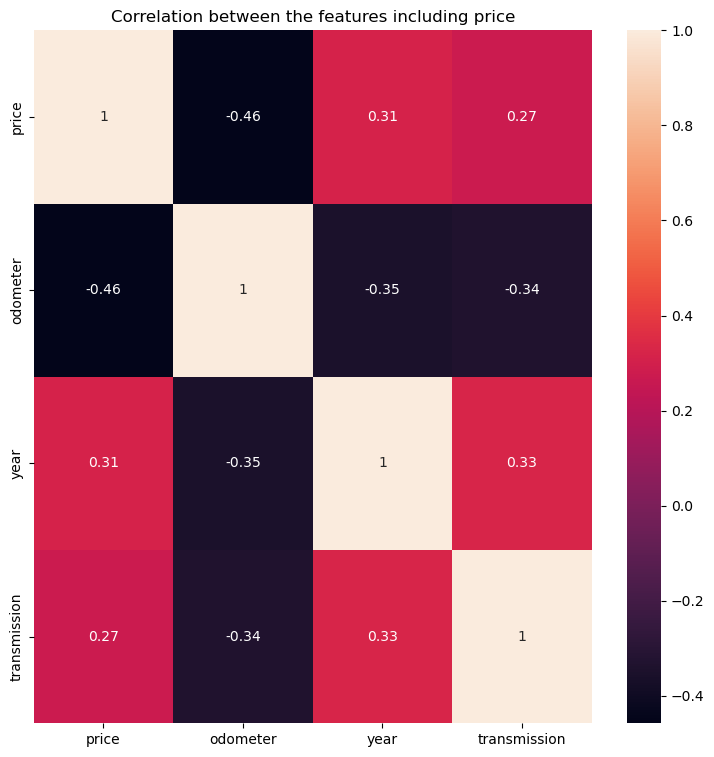

In [227]:
# now we can plot the figure to understand the correlation better/easier
plt.figure(figsize=(9,9))
sns.heatmap(df3.corr(), annot=True)
plt.title('Correlation between the features including price')
plt.show()

In [229]:
df3.corr()['price'].sort_values() #one thing to be noticed is that transmission correlated with year (upgarde from others to automated could be the reason)

odometer       -0.457580
transmission    0.274121
year            0.314047
price           1.000000
Name: price, dtype: float64

<AxesSubplot:title={'center':'correlation between year and price'}, xlabel='price', ylabel='year'>

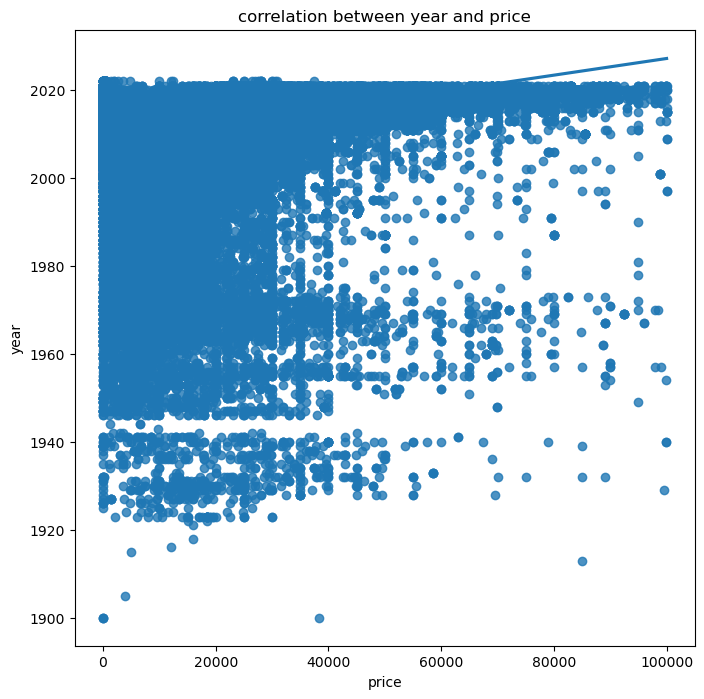

In [232]:
# we can futher visualize what we found in the correlation work
fig = plt.figure(figsize=(8,8))
plt.title('correlation between year and price')
sns.regplot(x='price', y='year', data=df3)


<AxesSubplot:title={'center':'correlation between transmission and price'}, xlabel='price', ylabel='transmission'>

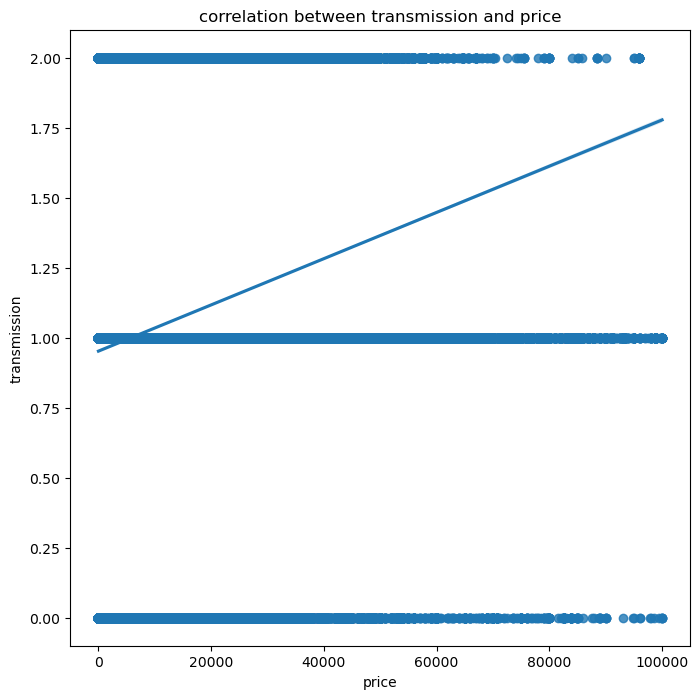

In [233]:
# we can futher visualize what we found in the correlation work, however, it is hard to find the correlation with categorical data in this case
fig = plt.figure(figsize=(8,8))
plt.title('correlation between transmission and price')
sns.regplot(x='price', y='transmission', data=df3)

<AxesSubplot:title={'center':'correlation between odometer and price'}, xlabel='price', ylabel='odometer'>

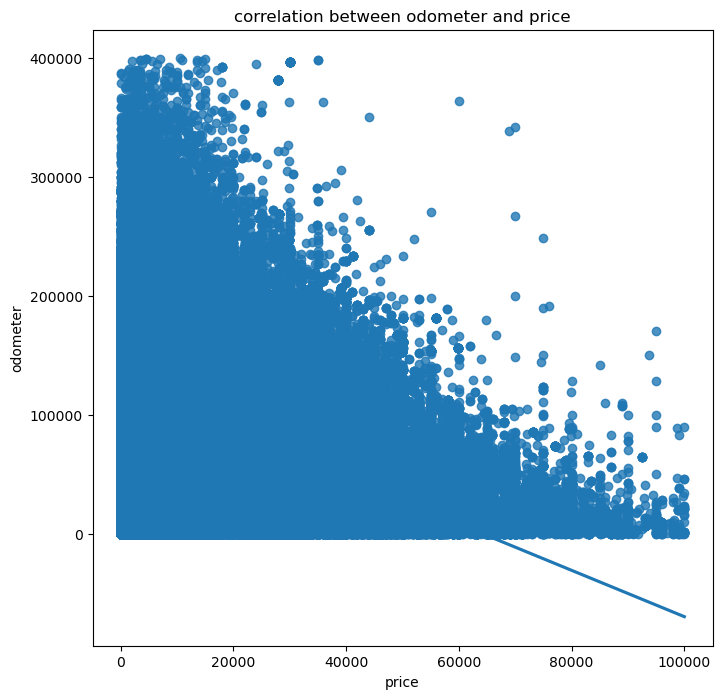

In [234]:
# we can futher visualize what we found in the correlation work
fig = plt.figure(figsize=(8,8))
plt.title('correlation between odometer and price')
sns.regplot(x='price', y='odometer', data=df3)

In [ ]:
#integrate data, this step has been done during the previous steps to organize the dataset

In [ ]:
# Format data, since we are not doing AI based training in this case, we will use in-build random selection data

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [245]:
#Select Modeling Technique : here we are going to start with lineareression then move forward with 
#Output: Modeling technique and Modelling assumptions

import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
#Generae test design (separate the train and test datasets)
#Test design: random divide into training and testing 

In [240]:
X = df3.drop(['price'], axis=1)
y = df3['price']
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size=.1)

shape of X =  (401935, 3)
shape of y =  (401935,)


In [241]:
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (361741, 3)
shape of y_train =  (361741,)
shape of X_test =  (40194, 3)
shape of y_test =  (40194,)


In [ ]:
#Build model: Ridge model with right alpha number screened 
#Parameter settings: 
#Models
#Model descriptions 


In [257]:
#hold-out for model choice on alpha for Ridge
pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(pipe, param_grid=param_dict)
model = grid.fit(X_train.values, y_train) #be careful if not using values, could lead to issue of losing features for plt
train_preds = grid.predict(X_train)
test_preds = grid.predict(X_test)
model_train_mse = mean_squared_error(y_train, train_preds)
model_test_mse = mean_squared_error(y_test, test_preds)
model_best_alpha = grid.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [258]:
print(model_train_mse,model_test_mse,model_best_alpha)

162130148.0037451 162230840.3564299 {'ridge__alpha': 10.0}


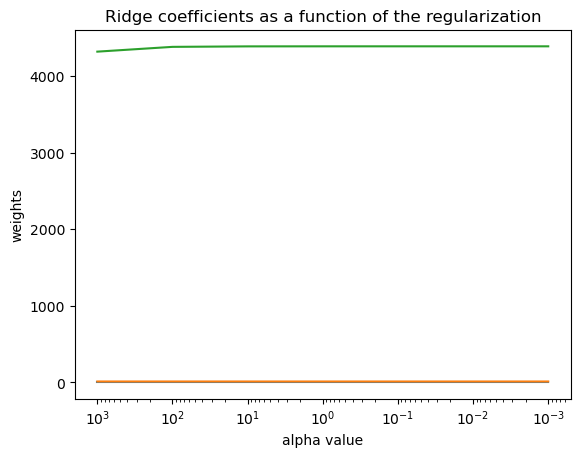

In [259]:
import matplotlib.pyplot as plt
alphas = [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]
coefs = []
for i in alphas:
    ridge = Ridge(alpha=i, fit_intercept=False)
    ridge.fit(X_train.values, y_train) #be careful if not using values, could lead to issue of losing features for plt
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha value')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [260]:
X_train

,odometer,year,transmission
306261,156839.0,2015.0,1
178660,81590.0,2011.0,1
4223,32159.0,2015.0,1
262808,42045.0,2013.0,1
302298,105781.0,2015.0,1
...,...,...,...
342536,68111.0,2018.0,1
80144,30290.0,2019.0,1
139780,105528.0,2004.0,0
393384,165065.0,2012.0,1


In [261]:
# perform permutation importance
from sklearn.inspection import permutation_importance
results = permutation_importance(model, X_train.values, y_train, scoring='neg_mean_squared_error')

Feature: 0, Score: 59140717.23007
Feature: 1, Score: 9861321.06700
Feature: 2, Score: 4357707.12336


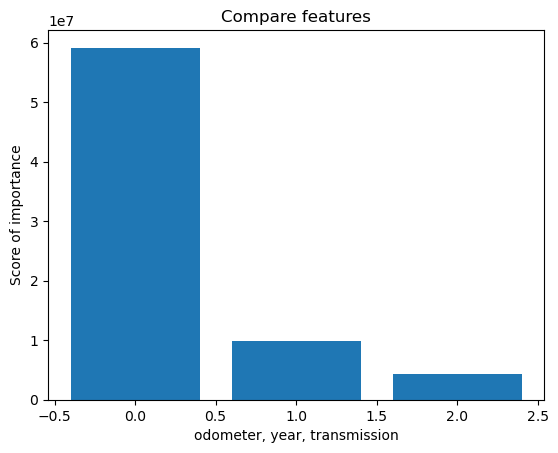

In [266]:
# get importance ranking from most important to least odometer>year>transmission 
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('odometer, year, transmission')
plt.ylabel('Score of importance') 
plt.title('Compare features')
plt.show()

In [274]:
#model 2 with lasso
#be careful if not using values, could lead to issue of losing features for plt
lasso_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 1, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
lasso_pipe.fit(X_train, y_train)
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_
print(lasso_coefs)


[-5433.67906096  2210.32312086  1464.39342511]


In [283]:
#we can make a more general model in this case, you can also see the coefs values do not change much comparing to the previous lasso
model_selector_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
                                ('scaler', StandardScaler()),
                                ('selector', SelectFromModel(Lasso())),
                                    ('linreg', LinearRegression())])
model_selector_pipe.fit(X_train, y_train)
lasso_train_mse = mean_squared_error(y_train, model_selector_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, model_selector_pipe.predict(X_test))
feature_names = lasso_pipe.named_steps['polyfeatures'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})
print(lasso_df)

print('lasso_train_mse = ', lasso_train_mse)
print('model_train_mse = ', model_train_mse)
print('lasso_test_mse = ', lasso_test_mse)
print('model_test_mse = ', model_test_mse)

        feature         coef
0      odometer -5433.679061
1          year  2210.323121
2  transmission  1464.393425
lasso_train_mse =  162130147.98093072
model_train_mse =  162130148.0037451
lasso_test_mse =  162230837.20872456
model_test_mse =  162230840.3564299


In [294]:
#Based on the finding, we will proceed with lasso model to the business owner

In [293]:
#let us try some selected conditios like 10000 miles, 2000 yr made, automatic car worth how much (ca. 3k USD), and it is higher than older, more milage car
d = {'odometer': [10000, 20000], 'year': [2000, 1991], 'transmission': [1,1]}
df_random = pd.DataFrame(data=d)
print(model_selector_pipe.predict(df_random))

[21235.65021329 18113.9835765 ]


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.